## General Notes:

***Name:*** Yashaswi Sharma

***UID:*** 116245821

Attached with every Section is the question number. Below, you can see that the **Moving Average of rainfall in College Park** is the first question, hence it has a **(1)** at the end to signify its the first question

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

# Moving Average of rainfall in College Park. (1)  

Use the kernel K1 and the data X below to compute a weighted moving average.   There should be no wrap-around and no padding. Show a plot comparing the resulting moving average and the original data X.  You will want to pad the moving average by three 0's on each side so the two plots line up. 

In [41]:
X = np.array([0., 0., 0., 3.01, 0.07, 0., 0., 0., 0., 0.02, 1.7, 0.02, 0., 0., 0., 0., 0., 0., 0.07, 0.15, 0.36, 0., 0.07, 0., 0.28, 0.12, 0., 0., 0., 1.67, 0.1, 0., 0., 0., 0.07, 0.07, 0., 0., 0., 0., 0., 0.02, 0., 0.07, 0.28, 0.88, 0.02, 0., 0.25, 1.7, 0., 0., 0., 0., 0., 0., 0., 0.02, 1.98, 0., 0., 0.07, 0., 0., 0., 0., 0., 0., 0., 0.07, 0.1, 0.61, 0., 0., 0., 0.3, 0.99, 0., 0., 0., 0.37, 4.67, 0., 0., 0., 1.07, 0., 2.25, 0.12, 0., 0., 0., 0.1, 0., 0.88, 0.25, 0., 0., 1.01, 2.24])
k1 = [0.06, 0.12, 0.19, 0.25, 0.19, 0.12, 0.06]
k1.reverse()
k1 = np.array(k1)
print(X.shape)
print(X)
print(k1.shape)
print(k1)

(100,)
[0.   0.   0.   3.01 0.07 0.   0.   0.   0.   0.02 1.7  0.02 0.   0.
 0.   0.   0.   0.   0.07 0.15 0.36 0.   0.07 0.   0.28 0.12 0.   0.
 0.   1.67 0.1  0.   0.   0.   0.07 0.07 0.   0.   0.   0.   0.   0.02
 0.   0.07 0.28 0.88 0.02 0.   0.25 1.7  0.   0.   0.   0.   0.   0.
 0.   0.02 1.98 0.   0.   0.07 0.   0.   0.   0.   0.   0.   0.   0.07
 0.1  0.61 0.   0.   0.   0.3  0.99 0.   0.   0.   0.37 4.67 0.   0.
 0.   1.07 0.   2.25 0.12 0.   0.   0.   0.1  0.   0.88 0.25 0.   0.
 1.01 2.24]
(7,)
[0.06 0.12 0.19 0.25 0.19 0.12 0.06]


If there is no padding and no wrap-around, then we assume that the stride = 1.

In [42]:
mavg = []
for i in range(7, 101):
    mavg.append(k1.dot(X[i-7:i]))
mavg.extend([0,0,0])
mavg = [0,0,0] + mavg
len(mavg)

100

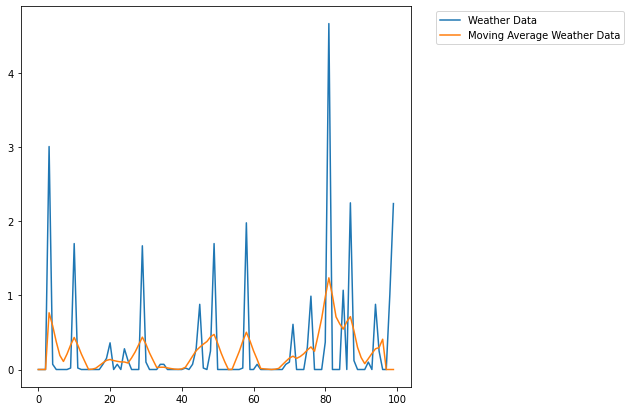

In [43]:
plt.figure(figsize=(7,7))
plt.plot(X, label='Weather Data')
plt.plot(mavg, label='Moving Average Weather Data')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

# Auto-correlation. (2) 

Create the kernel K2 by reversing the data Y and shift it so the first element is in the first position.  The n-th element of the resulting list K2[[n]] should be Y[[103 - n]] except for the first element K2[[1]]==Y[[1]].  Then list convolve K2 and the data Y to find the autocorrelation (unnormalized) and make a plot.  Do you see any patterns?  Where does it achieve the largest values? If the original sequence is almost periodic, what are some candidate almost periods?

In [95]:
Y = [1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 
1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1,
1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 
-1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 
1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1]
k2 = Y[::-1]
last = k2.pop(len(k2) - 1)
k2 = np.array([last] + k2)
Y = np.array(Y + Y)
print(Y.shape)
print(Y)
print(k2.shape)
print(k2)

(202,)
[ 1  1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1
 -1 -1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1
 -1 -1 -1  1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1
  1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1  1
 -1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1
 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1
 -1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1
  1  1  1 -1  1 -1 -1 -1  1 -1]
(101,)
[ 1 -1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1  1
 -1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1
  1  1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1  1 -1
  1  1 -1  1  1]


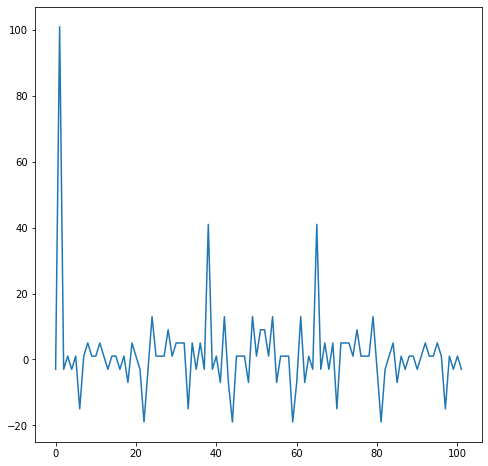

In [96]:
acorr = np.convolve(k2, Y, mode='valid')
plt.figure(figsize=(8,8))
plt.plot(acorr)
plt.show()

The graph does seem to follow a pattern between t = 6 to t = 38 that repeats between t = 44 to t = 65 and so on. It achieves a max of  at t = 38/65 and a min of -19 at t = 44.

**Candidate Period:** $65-38 = 27$

# Machine Learning. (3)

The vectors in Z1 are supposed to map to the vectors in Z2.   You will compare a dot-layer with a convolution layer.  Instead of machine learning techniques, you will use Least Squares to do the optimization.

In [52]:
Z1 = np.array([[9, 3, -6, 4, -5, 4], [-5, 5, -3, -5, -1, -9], [-9, -4, 4, -7, 6, 8], [3, 6, 4, -1, 6, 5], [6, -4, 6, 2, -5, 7], [-6, 1, -7, 1, 4, 2], [5, 7, -4, -7, 5, -4],
[-5, -1, 8, -9, 7, -7], [-1, 3, 6, 1, 3,   8], [-4, -7, 4, -1, -8, 2]])

Z2 = np.array([[7, -6, 8, -6], [1, -3, -7, 5], [9, 3, 2, 2], [3, -1, 0, 8], [1, -2, 1, 7], [-6, -8, 9, 9], [4, -3, -4, -4], [-9, -6, 8, 0], [-7, 4, -2,  8], [7, 0, -1, 1]])

print(Z1.shape)
print(Z1)
print(Z2.shape)
print(Z2)

(10, 6)
[[ 9  3 -6  4 -5  4]
 [-5  5 -3 -5 -1 -9]
 [-9 -4  4 -7  6  8]
 [ 3  6  4 -1  6  5]
 [ 6 -4  6  2 -5  7]
 [-6  1 -7  1  4  2]
 [ 5  7 -4 -7  5 -4]
 [-5 -1  8 -9  7 -7]
 [-1  3  6  1  3  8]
 [-4 -7  4 -1 -8  2]]
(10, 4)
[[ 7 -6  8 -6]
 [ 1 -3 -7  5]
 [ 9  3  2  2]
 [ 3 -1  0  8]
 [ 1 -2  1  7]
 [-6 -8  9  9]
 [ 4 -3 -4 -4]
 [-9 -6  8  0]
 [-7  4 -2  8]
 [ 7  0 -1  1]]


## Find a least squares solution Z1 dot X3a = Z2 and compute its mean-squared error. (3a)

In [68]:
solu, res, rank, sing = np.linalg.lstsq(Z1, Z2)
print('LEAST SQUARED SOLUTION:')
print('-------------------------------------------------------')
print(solu.shape)
print(solu)
print('-------------------------------------------------------')
print(res)
print(rank)
print(sing)

LEAST SQUARED SOLUTION:
-------------------------------------------------------
(6, 4)
[[ 0.28582513 -0.18804364  0.32501406 -0.84228359]
 [-0.06483465  0.08021037 -0.9235975   1.04832196]
 [-0.64051127  0.36630506 -0.41255508  0.54087735]
 [-1.43069495  0.37900837  0.10982559  0.36569715]
 [-0.88127734 -0.02860535  0.7785009  -0.29474797]
 [ 0.78697713  0.03776505  0.10499036  0.4168276 ]]
-------------------------------------------------------
[122.03582832 135.08115996 190.37426684 137.45143456]
6
[24.89438941 22.38804995 17.79894742 13.91296638  7.49619352  6.20310529]


<ipython-input-68-708126643c52>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  solu, res, rank, sing = np.linalg.lstsq(Z1, Z2)


In [100]:
mse3a = (np.square(Z1.dot(solu) - Z2)).sum() / 10
print('Mean Squared Err: {}'.format(mse3a))

Mean Squared Err: 58.49426896775658


## Find a best fit convolution mapping Z1 to Z2 as follows.  The kernel will be size 3 with no overhangs or wrap-around or padding.  (3b)

### Create the vector Z3 by flattening the matrix Z2 into a vector of length 40. (1)

In [65]:
Z3 = Z2.flatten()
print(Z3.shape)
print(Z3)

(40,)
[ 7 -6  8 -6  1 -3 -7  5  9  3  2  2  3 -1  0  8  1 -2  1  7 -6 -8  9  9
  4 -3 -4 -4 -9 -6  8  0 -7  4 -2  8  7  0 -1  1]


### The matrix C3 was computed using the coefficients of the symbolic convolutions, and it is given to you below.  Check that C3 dot (c1 c2 c3)  is the same as convolving each row of Z1 by the kernel (c1 c2 c3) followed by flattening, by computing both in the case of c1 = 1, c2 = 2, c3 =3 (2)

In [66]:
C3 = np.array([[-6, 3, 9], [4, -6, 3], [-5, 4, -6], [4, -5, 4], [-3, 5, -5], [-5, -3, 5], [-1, -5, -3], [-9, -1, -5], [4, -4, -9], [-7, 4, -4], [6, -7, 4], [8, 6, -7], [4, 6, 3], [-1, 4, 6], [6, -1, 4], [5, 6, -1], [6, -4, 6], [2, 6, -4], [-5, 2, 6], [7, -5, 2], [-7, 1, -6], [1, -7, 1], [4, 1, -7], [2, 4, 1], [-4, 7, 5], [-7, -4, 7], [5, -7, -4], [-4, 5, -7], [8, -1, -5], [-9, 8, -1], [7, -9, 8], [-7, 7, -9], [6, 3, -1], [1, 6, 3], [3, 1, 6], [8, 3, 1], [4, -7, -4], [-1, 4, -7], [-8, -1, 4], [2, -8, -1]])
print(C3.shape)
print(C3)

(40, 3)
[[-6  3  9]
 [ 4 -6  3]
 [-5  4 -6]
 [ 4 -5  4]
 [-3  5 -5]
 [-5 -3  5]
 [-1 -5 -3]
 [-9 -1 -5]
 [ 4 -4 -9]
 [-7  4 -4]
 [ 6 -7  4]
 [ 8  6 -7]
 [ 4  6  3]
 [-1  4  6]
 [ 6 -1  4]
 [ 5  6 -1]
 [ 6 -4  6]
 [ 2  6 -4]
 [-5  2  6]
 [ 7 -5  2]
 [-7  1 -6]
 [ 1 -7  1]
 [ 4  1 -7]
 [ 2  4  1]
 [-4  7  5]
 [-7 -4  7]
 [ 5 -7 -4]
 [-4  5 -7]
 [ 8 -1 -5]
 [-9  8 -1]
 [ 7 -9  8]
 [-7  7 -9]
 [ 6  3 -1]
 [ 1  6  3]
 [ 3  1  6]
 [ 8  3  1]
 [ 4 -7 -4]
 [-1  4 -7]
 [-8 -1  4]
 [ 2 -8 -1]]


In [84]:
lst = []
for vec in Z1:
    lst.append(np.convolve(vec, [1,2,3], mode='valid'))
lst = np.array(lst)
z1_flat = lst.flatten()
mtrx_c3 = C3.dot([1,2,3])
z1_flat == mtrx_c3

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Proven above.

### Compute the least squares solution for C3 dot (c1 c2 c3) = Z3 .  This (c1 c2 c3) is the best fit convolution kernel.  Compute the error-squared and divide by 10 (the number of rows of Z2) in order to compare to the mean-squared error from (3a). (3)

In [101]:
solu3a, _,_,_ = np.linalg.lstsq(C3, Z3)
print(solu3a)

[0.21297678 0.23094064 0.03386041]


<ipython-input-101-563387929587>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  solu3a, _,_,_ = np.linalg.lstsq(C3, Z3)


In [98]:
errsum3b3 = np.square(C3.dot(solu3a) - Z3).sum()
errsum3b3 /= 10
print('Mean Squared Err: {}'.format(errsum3b3))

Mean Squared Err: 110.89459565992065


## Find the typical range of errors for alternatives in (3a) by computing the mean-squared error for 1000 random samples where the coefficients range from -1 to 1.  Make a histogram of those mean-squared errors and find its average.  Compare that to the difference in mean-squared errors found in (3a) and (3b). (3c)

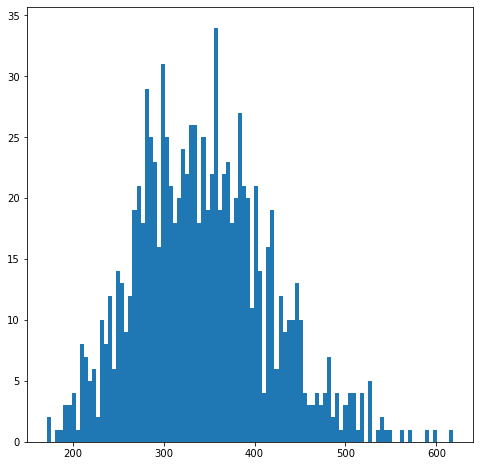

In [107]:
errs3c = []
for i in range(1000):
    poss = np.random.uniform(-1,1,(6,4))
    errs3c.append((np.square(Z1.dot(poss) - Z2)).sum() / 10)
errs3c = np.array(errs3c)
plt.figure(figsize=(8,8))
plt.hist(errs3c, 100)
plt.show()

In [111]:
print('MSE Avg of Alternatives: {}'.format(errs3c.mean()))

MSE Avg of Alternatives: 343.6572617478635


The err of **3a** is **very low**. The err of **3b** is a **decent amount**. And the avg err of **3c** is **very big**

## What are the pros of using the least square solution in (a)?  What are the pros of using the convolution found in (b)?  What are the practical implications for machine learning when choosing between a dot-layer like (a) versus a convolution layer like (b) ? (3d)

***3a Least Squares***

**Pros**
1. Due to high number of parameters, we will learn more from our sampling distribution.
2. Low Bias to model leading to a very low likelihood that our intrinsic model "architecture" is unable to properly model the underlying sample. (Bias Variance Tradeoff)

**Cons**
1. Higher number of parameters will lead to fewer degrees of freedom causing our model to have high variance (in terms of variability of the model given some of the sample is replaced ie remove some and add). Effectively, this means that the parameters are extremely sensative to the underlying sample in our training set. (Bias Variance Tradeoff)
2. Higher number of parameters will also cause issues with the generalization of the model to new data outside the sample, and this model will be heavily exposed to sampling bias.

***Convolution***

**Pros**
1. Low number of trainable parameters, hence our model will have lower sampling bias dependency leading it to generalize better.
2. Low variance model thereby our model is robust to underlying sample changes. (Bias Variance Tradeoff)

**Cons**
1. Low number of parameters will lead to higher bias err as our model could be intrinsically too insufficient to properly model the underlying trends in the data.
2. Low number of parameters will cause issues of underfitting as our model does not learn enough of the sampling distribution.

# Continuous Cellular Automaton. (4)

Use the model in the textbook  download.  Pick your own parameters (different from other students) w2 and w3 and evolve your cellular automaton for five steps starting with random initial conditions.   Make a plot of the last step.  The goal is to make a striped or spotted pattern.

In [113]:
w2 = 0
w3 = 1
model4 = np.array([[w3 for i in range(7)], [w3,w2,w2,w2,w2,w2,w3], [w3,w2,1,1,1,w2,w3], [w3,w2,1,1,1,w2,w3], [w3,w2,1,1,1,w2,w3], [w3,w2,w2,w2,w2,w2,w3], [w3 for i in range(7)]])
model4


array([[1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1]])

I am not sure how to do this and it is 5 am. I am sorry =(